# Data Generation for 2D Laplace Equation  
(Please reference to our paper **Physics-Informed Boundary Integral Networks (PIBI-Nets): a Data-Driven Approach for Solving Partial Differential Equations**.)

## Toy Example: Dirichlet Boundary Conditions 
## Data set for sampling close to the boundary
---

# Problem setup

## Laplace equation 
$$ \Delta u(x) := \frac{\partial^2 u}{\partial x_1^2} + \frac{\partial^2 u}{\partial x_2^2} = 0 $$

$$x:=(x_1, x_2)\, \in \,\left([-1,1]\times [-1,1]\right)=:\Omega \subseteq \mathbb{R}^2$$

## Boundary conditions
\begin{equation}\label{eq:laplace_toy}
\begin{aligned}
    &\Delta u(x) = 0, \qquad\qquad &&&\text{in } \Omega=[-1,1]\\
    &\left.
    \begin{aligned}
        &u(x_1=-1,x_2)&&=\sin \left(\frac{3}{2\pi}\; x_2 + \frac{\pi}{2}\right),\\
        &u(x_1=1, x_2)&&=\frac{1}{2}(x_2+1), \\
        &u(x_1,x_2=-1)&&=
        \begin{cases}
            1-x_1,\;\;\;\, x_1>=0,\\
            x_1+1,\;\;\;\; x_1<0,
        \end{cases} \\
        &u(x_1,x_2=1)&&=
        \begin{cases}
            1,\;\;\;\, x_1>=0,\\
            1-|x_1|,\;\;\;\; x_1<0.
        \end{cases}
    \end{aligned}
    \right\} &&&\text{on }\partial\Omega
\end{aligned}
\end{equation}

In [1]:
import numpy as np
# plot package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # colormaps
from matplotlib.font_manager import FontProperties

In [2]:
import pandas as pd

In [3]:
matplotlib.rcParams['text.usetex'] = True
# font properties for plot titles
font_title = FontProperties()
font_title.set_family('serif')
font_title.set_name('Times New Roman')
font_title.set_size(45)  # Set the font size to match LaTeX, e.g., 12pt
font_title.set_weight('bold')
# font properties for plot titles
font_axis = FontProperties()
font_axis.set_family('serif')
font_axis.set_name('Times New Roman')
font_axis.set_size(115)  # Set the font size to match LaTeX, e.g., 12pt
# font properties for 3d plot titles
font_axis_3d = FontProperties()
font_axis_3d.set_family('serif')
font_axis_3d.set_name('Times New Roman')
font_axis_3d.set_size(90)  # Set the font size to match LaTeX, e.g., 12pt

## Computational domain

In [4]:
# solution domain (x1, x2) in [-1,1]x[-1,1]
Omega = np.array([[-1, 1],   # x1 subdomain
                  [-1, 1]])  # x2 subdomain

def u_hat(x):
    return np.where(x < 0, x + 1, 1 - x)

def u_sin(x):
    return np.sin(3/2 * np.pi * x + np.pi/2)

def u_plin(x):
    return np.where(x<0, 1-abs(x), 1)

def u_linear(x):
    return (x + 1) / 2

# build mesh
n = 101 # grid size
x1 = np.linspace(-1, 1 , n) # (n,)
x2 = np.linspace(-1, 1 , n)
X1, X2 = np.meshgrid(x1, x2) # (n,n)
Delta = 2/(np.size(x1)-1)
print('Delta x:', Delta)

Delta x: 0.02


In [5]:
# Reshape X1 and X2 as a (N, 2) vector
N = X1.shape[0] * X1.shape[1]
X_mesh = np.column_stack((X1.reshape(N,1), X2.reshape(N,1)))
# save X = (x1,x2)
np.savetxt('X_mesh.csv', X_mesh, delimiter=",", header="x1,x2", fmt="%.6f", comments='')

# Solution with finite difference (FD) method

In [6]:
# solve pde by using finite differences
def laplace_equation(n):
    """
    finite difference solver for 2D Laplace equation
    
    Args:
        - n: integer, n*n number of gridpoints in domain Omega

    Returns:
        - u: np.array (n,n), solution array of Laplace equation 
    """
    
    # solution matrix initialisation
    u = np.zeros((n, n))
    
    # define the boundary conditions
    u[:,0] = u_sin(x2)
    u[0,:] =  u_hat(x1)
    u[-1,:] = u_plin(x1)
    u[:,-1] = u_linear(x2)

    # define the relative tolerance and maximum number of iterations
    tol = 1e-3# adjustable residuum precision
    maxiter = 10000 # adjustable

    # FD-iteration to find pde solution
    for iter in range(maxiter):
        u_prev = np.copy(u)
        for i in range(1,n-1):
            for j in range(1,n-1):
                u[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1])/4
        print('res', np.linalg.norm(u-u_prev), 'iter', iter)
        # check if the solution has converged
        if np.linalg.norm(u-u_prev) < tol:
            break
    return u

# compute the solution
u = laplace_equation(n)
# save solution in a vector as ground truth
u_num = u.reshape(N,1)
np.savetxt('u_num.csv', u_num, header="u", fmt="%.6f", comments='')

res 4.640119616673482 iter 0
res 2.511161441262228 iter 1
res 1.7630657431920802 iter 2
res 1.3823827223534968 iter 3
res 1.149178970129977 iter 4
res 0.9900707607061594 iter 5
res 0.8737624445670885 iter 6
res 0.7845770894750261 iter 7
res 0.7137463401396018 iter 8
res 0.6559598009629294 iter 9
res 0.6078021662887946 iter 10
res 0.5669711502248009 iter 11
res 0.5318548703777808 iter 12
res 0.5012890872414861 iter 13
res 0.47441063744488027 iter 14
res 0.4505652021595263 iter 15
res 0.42924719881927725 iter 16
res 0.41005941390104345 iter 17
res 0.39268517809414316 iter 18
res 0.376868744370447 iter 19
res 0.3624011690654897 iter 20
res 0.3491099688091408 iter 21
res 0.33685142080165387 iter 22
res 0.3255047472844742 iter 23
res 0.314967665127041 iter 24
res 0.3051529391763659 iter 25
res 0.29598568367914657 iter 26
res 0.28740122813787805 iter 27
res 0.2793434138975025 iter 28
res 0.2717632228852304 iter 29
res 0.264617664976105 iter 30
res 0.2578688685489005 iter 31
res 0.25148333201

res 0.04363675848392261 iter 262
res 0.0435036562543272 iter 263
res 0.04337153747431845 iter 264
res 0.04324039111117953 iter 265
res 0.04311020629553054 iter 266
res 0.042980972318341915 iter 267
res 0.04285267862801143 iter 268
res 0.04272531482750321 iter 269
res 0.042598870671545025 iter 270
res 0.042473336063885446 iter 271
res 0.04234870105460817 iter 272
res 0.04222495583750044 iter 273
res 0.04210209074747831 iter 274
res 0.04198009625806356 iter 275
res 0.04185896297891292 iter 276
res 0.04173868165339854 iter 277
res 0.04161924315623748 iter 278
res 0.041500638491170035 iter 279
res 0.041382858788685556 iter 280
res 0.041265895303794105 iter 281
res 0.04114973941384418 iter 282
res 0.04103438261638377 iter 283
res 0.040919816527065285 iter 284
res 0.04080603287759225 iter 285
res 0.04069302351370786 iter 286
res 0.04058078039322396 iter 287
res 0.04046929558408848 iter 288
res 0.04035856126249303 iter 289
res 0.04024856971101711 iter 290
res 0.04013931331680963 iter 291
res 

res 0.026248744565854243 iter 509
res 0.026210449605646002 iter 510
res 0.026172281032773467 iter 511
res 0.026134238026171583 iter 512
res 0.026096319771468833 iter 513
res 0.02605852546092593 iter 514
res 0.026020854293376954 iter 515
res 0.0259833054741694 iter 516
res 0.025945878215106057 iter 517
res 0.025908571734386633 iter 518
res 0.02587138525655068 iter 519
res 0.02583431801241997 iter 520
res 0.025797369239043563 iter 521
res 0.025760538179640826 iter 522
res 0.025723824083547377 iter 523
res 0.02568722620615975 iter 524
res 0.025650743808881885 iter 525
res 0.025614376159071372 iter 526
res 0.025578122529986883 iter 527
res 0.025541982200735683 iter 528
res 0.02550595445622119 iter 529
res 0.02547003858709285 iter 530
res 0.025434233889693996 iter 531
res 0.025398539666012663 iter 532
res 0.02536295522363124 iter 533
res 0.025327479875676722 iter 534
res 0.025292112940772944 iter 535
res 0.025256853742991317 iter 536
res 0.025221701611803343 iter 537
res 0.02518665588203314

res 0.019247954084688285 iter 758
res 0.019226524177037872 iter 759
res 0.01920512975586872 iter 760
res 0.01918377069062877 iter 761
res 0.019162446851608162 iter 762
res 0.019141158109932308 iter 763
res 0.01911990433755591 iter 764
res 0.019098685407255563 iter 765
res 0.01907750119262455 iter 766
res 0.01905635156806564 iter 767
res 0.019035236408784767 iter 768
res 0.01901415559078521 iter 769
res 0.018993108990861252 iter 770
res 0.018972096486591834 iter 771
res 0.018951117956334546 iter 772
res 0.018930173279219694 iter 773
res 0.018909262335144297 iter 774
res 0.018888385004765775 iter 775
res 0.0188675411694965 iter 776
res 0.018846730711497905 iter 777
res 0.018825953513674294 iter 778
res 0.018805209459667405 iter 779
res 0.01878449843385076 iter 780
res 0.018763820321324 iter 781
res 0.018743175007906433 iter 782
res 0.01872256238013315 iter 783
res 0.01870198232524774 iter 784
res 0.01868143473119834 iter 785
res 0.018660919486630907 iter 786
res 0.018640436480884502 iter

res 0.014648906504943403 iter 1015
res 0.014633846799695663 iter 1016
res 0.01461880501075088 iter 1017
res 0.014603781103943428 iter 1018
res 0.014588775045242152 iter 1019
res 0.01457378680074977 iter 1020
res 0.014558816336701585 iter 1021
res 0.014543863619464843 iter 1022
res 0.014528928615538101 iter 1023
res 0.01451401129154997 iter 1024
res 0.01449911161425887 iter 1025
res 0.0144842295505519 iter 1026
res 0.01446936506744374 iter 1027
res 0.014454518132076611 iter 1028
res 0.01443968871171911 iter 1029
res 0.014424876773765194 iter 1030
res 0.014410082285733664 iter 1031
res 0.01439530521526757 iter 1032
res 0.014380545530133015 iter 1033
res 0.014365803198218539 iter 1034
res 0.014351078187534956 iter 1035
res 0.0143363704662136 iter 1036
res 0.014321680002506524 iter 1037
res 0.01430700676478506 iter 1038
res 0.014292350721539471 iter 1039
res 0.014277711841378136 iter 1040
res 0.014263090093027082 iter 1041
res 0.014248485445328495 iter 1042
res 0.014233897867241304 iter 10

res 0.011427245933263476 iter 1260
res 0.011415790656277007 iter 1261
res 0.011404347570371691 iter 1262
res 0.011392916659273982 iter 1263
res 0.01138149790674732 iter 1264
res 0.01137009129659286 iter 1265
res 0.011358696812648261 iter 1266
res 0.011347314438788817 iter 1267
res 0.011335944158926085 iter 1268
res 0.011324585957008469 iter 1269
res 0.011313239817020787 iter 1270
res 0.011301905722984416 iter 1271
res 0.011290583658956424 iter 1272
res 0.011279273609030143 iter 1273
res 0.011267975557335073 iter 1274
res 0.011256689488035992 iter 1275
res 0.011245415385333468 iter 1276
res 0.011234153233463383 iter 1277
res 0.011222903016697356 iter 1278
res 0.011211664719341334 iter 1279
res 0.011200438325737064 iter 1280
res 0.01118922382026054 iter 1281
res 0.011178021187322881 iter 1282
res 0.011166830411369564 iter 1283
res 0.01115565147688064 iter 1284
res 0.011144484368370204 iter 1285
res 0.011133329070386846 iter 1286
res 0.01112218556751287 iter 1287
res 0.011111053844364558 

res 0.009021660135607625 iter 1497
res 0.009012705199233471 iter 1498
res 0.009003759388342126 iter 1499
res 0.008994822692559846 iter 1500
res 0.008985895101529568 iter 1501
res 0.00897697660491154 iter 1502
res 0.008968067192381331 iter 1503
res 0.0089591668536315 iter 1504
res 0.008950275578370633 iter 1505
res 0.008941393356323902 iter 1506
res 0.008932520177232658 iter 1507
res 0.00892365603085413 iter 1508
res 0.008914800906962055 iter 1509
res 0.0089059547953461 iter 1510
res 0.008897117685812032 iter 1511
res 0.008888289568181707 iter 1512
res 0.008879470432292652 iter 1513
res 0.008870660267998876 iter 1514
res 0.008861859065169696 iter 1515
res 0.008853066813690661 iter 1516
res 0.008844283503462995 iter 1517
res 0.008835509124403566 iter 1518
res 0.008826743666444965 iter 1519
res 0.00881798711953566 iter 1520
res 0.00880923947363975 iter 1521
res 0.008800500718736627 iter 1522
res 0.008791770844821526 iter 1523
res 0.008783049841904767 iter 1524
res 0.008774337700012567 ite

res 0.007084489162566242 iter 1741
res 0.0070774872958998866 iter 1742
res 0.007070492425671858 iter 1743
res 0.007063504544528837 iter 1744
res 0.007056523645126681 iter 1745
res 0.007049549720131166 iter 1746
res 0.007042582762216826 iter 1747
res 0.0070356227640673225 iter 1748
res 0.007028669718375918 iter 1749
res 0.00702172361784508 iter 1750
res 0.007014784455186271 iter 1751
res 0.007007852223120448 iter 1752
res 0.007000926914377084 iter 1753
res 0.0069940085216957226 iter 1754
res 0.0069870970378243975 iter 1755
res 0.006980192455520529 iter 1756
res 0.006973294767550487 iter 1757
res 0.00696640396668973 iter 1758
res 0.006959520045722851 iter 1759
res 0.006952642997443583 iter 1760
res 0.006945772814654443 iter 1761
res 0.006938909490167009 iter 1762
res 0.0069320530168023135 iter 1763
res 0.006925203387389645 iter 1764
res 0.006918360594767508 iter 1765
res 0.006911524631783878 iter 1766
res 0.006904695491294739 iter 1767
res 0.006897873166165878 iter 1768
res 0.00689105764

res 0.005567094867697366 iter 1985
res 0.00556160212337193 iter 1986
res 0.005556114820695164 iter 1987
res 0.005550632954155544 iter 1988
res 0.005545156518248166 iter 1989
res 0.005539685507473671 iter 1990
res 0.005534219916339259 iter 1991
res 0.005528759739357654 iter 1992
res 0.0055233049710481635 iter 1993
res 0.005517855605936339 iter 1994
res 0.005512411638553366 iter 1995
res 0.005506973063436623 iter 1996
res 0.00550153987512967 iter 1997
res 0.005496112068182021 iter 1998
res 0.005490689637149471 iter 1999
res 0.005485272576593317 iter 2000
res 0.005479860881081427 iter 2001
res 0.005474454545187456 iter 2002
res 0.005469053563491127 iter 2003
res 0.00546365793057808 iter 2004
res 0.005458267641039911 iter 2005
res 0.005452882689474403 iter 2006
res 0.005447503070485011 iter 2007
res 0.005442128778681652 iter 2008
res 0.005436759808679543 iter 2009
res 0.005431396155100541 iter 2010
res 0.005426037812571721 iter 2011
res 0.00542068477572686 iter 2012
res 0.00541533703920499

res 0.004414860696834055 iter 2220
res 0.004410507284225201 iter 2221
res 0.004406158169600109 iter 2222
res 0.004401813348676543 iter 2223
res 0.004397472817177481 iter 2224
res 0.004393136570829772 iter 2225
res 0.004388804605364934 iter 2226
res 0.004384476916518854 iter 2227
res 0.004380153500031978 iter 2228
res 0.0043758343516491 iter 2229
res 0.004371519467119697 iter 2230
res 0.004367208842197179 iter 2231
res 0.0043629024726396844 iter 2232
res 0.004358600354209867 iter 2233
res 0.0043543024826743215 iter 2234
res 0.004350008853804949 iter 2235
res 0.004345719463376924 iter 2236
res 0.004341434307170548 iter 2237
res 0.00433715338097029 iter 2238
res 0.004332876680564929 iter 2239
res 0.004328604201748216 iter 2240
res 0.0043243359403170225 iter 2241
res 0.004320071892073856 iter 2242
res 0.004315812052824885 iter 2243
res 0.0043115564183807565 iter 2244
res 0.0043073049845566164 iter 2245
res 0.0043030577471719145 iter 2246
res 0.004298814702050241 iter 2247
res 0.00429457584

res 0.003460158544661517 iter 2467
res 0.003456746950202603 iter 2468
res 0.0034533387193401177 iter 2469
res 0.0034499338487482207 iter 2470
res 0.0034465323351045287 iter 2471
res 0.0034431341750897934 iter 2472
res 0.003439739365388789 iter 2473
res 0.003436347902688739 iter 2474
res 0.0034329597836804714 iter 2475
res 0.0034295750050584483 iter 2476
res 0.003426193563520492 iter 2477
res 0.0034228154557672205 iter 2478
res 0.003419440678502709 iter 2479
res 0.0034160692284350203 iter 2480
res 0.003412701102274744 iter 2481
res 0.0034093362967361237 iter 2482
res 0.003405974808536825 iter 2483
res 0.003402616634397158 iter 2484
res 0.0033992617710418534 iter 2485
res 0.0033959102151978698 iter 2486
res 0.003392561963596162 iter 2487
res 0.003389217012970359 iter 2488
res 0.003385875360058143 iter 2489
res 0.003382537001599894 iter 2490
res 0.003379201934339234 iter 2491
res 0.0033758701550232494 iter 2492
res 0.003372541660402819 iter 2493
res 0.0033692164472310633 iter 2494
res 0.0

res 0.0027092399519153933 iter 2715
res 0.0027065685527345148 iter 2716
res 0.002703899786472482 iter 2717
res 0.002701233650533557 iter 2718
res 0.002698570142324422 iter 2719
res 0.0026959092592543296 iter 2720
res 0.002693250998735378 iter 2721
res 0.00269059535818201 iter 2722
res 0.002687942335011173 iter 2723
res 0.002685291926642551 iter 2724
res 0.0026826441304984754 iter 2725
res 0.0026799989440035215 iter 2726
res 0.0026773563645850393 iter 2727
res 0.002674716389672705 iter 2728
res 0.0026720790166992058 iter 2729
res 0.002669444243099235 iter 2730
res 0.0026668120663105 iter 2731
res 0.0026641824837728783 iter 2732
res 0.00266155549292881 iter 2733
res 0.002658931091223689 iter 2734
res 0.0026563092761048754 iter 2735
res 0.0026536900450227292 iter 2736
res 0.002651073395429835 iter 2737
res 0.0026484593247813903 iter 2738
res 0.002645847830535355 iter 2739
res 0.002643238910151667 iter 2740
res 0.002640632561093366 iter 2741
res 0.0026380287808257193 iter 2742
res 0.002635

res 0.0021275198346374594 iter 2960
res 0.0021254217806074304 iter 2961
res 0.0021233257945208377 iter 2962
res 0.002121231874340791 iter 2963
res 0.002119140018031665 iter 2964
res 0.0021170502235608028 iter 2965
res 0.0021149624888970376 iter 2966
res 0.0021128768120112877 iter 2967
res 0.0021107931908764662 iter 2968
res 0.0021087116234678755 iter 2969
res 0.002106632107761702 iter 2970
res 0.002104554641737808 iter 2971
res 0.0021024792233768643 iter 2972
res 0.002100405850661185 iter 2973
res 0.0020983345215764867 iter 2974
res 0.0020962652341093104 iter 2975
res 0.0020941979862485064 iter 2976
res 0.002092132775985202 iter 2977
res 0.0020900696013120205 iter 2978
res 0.0020880084602237984 iter 2979
res 0.0020859493507175055 iter 2980
res 0.0020838922707917444 iter 2981
res 0.0020818372184476072 iter 2982
res 0.002079784191687385 iter 2983
res 0.0020777331885162634 iter 2984
res 0.002075684206940402 iter 2985
res 0.002073637244968853 iter 2986
res 0.0020715923006119894 iter 2987
r

res 0.0016739564937401396 iter 3203
res 0.0016723055289209268 iter 3204
res 0.0016706561916550549 iter 3205
res 0.001669008480339242 iter 3206
res 0.0016673623933718053 iter 3207
res 0.0016657179291528878 iter 3208
res 0.0016640750860841885 iter 3209
res 0.0016624338625682272 iter 3210
res 0.001660794257010279 iter 3211
res 0.0016591562678161214 iter 3212
res 0.001657519893393902 iter 3213
res 0.0016558851321529732 iter 3214
res 0.001654251982503999 iter 3215
res 0.0016526204428598205 iter 3216
res 0.0016509905116343722 iter 3217
res 0.0016493621872432766 iter 3218
res 0.0016477354681038651 iter 3219
res 0.0016461103526347152 iter 3220
res 0.001644486839256273 iter 3221
res 0.001642864926390474 iter 3222
res 0.0016412446124603052 iter 3223
res 0.0016396258958912271 iter 3224
res 0.0016380087751095907 iter 3225
res 0.001636393248543437 iter 3226
res 0.001634779314622554 iter 3227
res 0.0016331669717777211 iter 3228
res 0.0016315562184419888 iter 3229
res 0.0016299470530494594 iter 3230


res 0.0013170536842843708 iter 3446
res 0.0013157545931081992 iter 3447
res 0.001314456782841595 iter 3448
res 0.0013131602522221955 iter 3449
res 0.0013118649999895146 iter 3450
res 0.0013105710248836307 iter 3451
res 0.0013092783256465198 iter 3452
res 0.0013079869010212209 iter 3453
res 0.001306696749751303 iter 3454
res 0.0013054078705825984 iter 3455
res 0.0013041202622618945 iter 3456
res 0.0013028339235368037 iter 3457
res 0.0013015488531562492 iter 3458
res 0.0013002650498708558 iter 3459
res 0.0012989825124318799 iter 3460
res 0.0012977012395924495 iter 3461
res 0.0012964212301062815 iter 3462
res 0.001295142482728711 iter 3463
res 0.0012938649962164186 iter 3464
res 0.0012925887693266943 iter 3465
res 0.0012913138008186465 iter 3466
res 0.001290040089452208 iter 3467
res 0.0012887676339892807 iter 3468
res 0.0012874964331917318 iter 3469
res 0.0012862264858237177 iter 3470
res 0.0012849577906500853 iter 3471
res 0.001283690346437308 iter 3472
res 0.001282424151952829 iter 347

res 0.001042378403537968 iter 3683
res 0.0010413501646893363 iter 3684
res 0.001040322939850247 iter 3685
res 0.0010392967280210186 iter 3686
res 0.0010382715282036645 iter 3687
res 0.001037247339400485 iter 3688
res 0.0010362241606152506 iter 3689
res 0.0010352019908523315 iter 3690
res 0.0010341808291176706 iter 3691
res 0.0010331606744172026 iter 3692
res 0.001032141525759037 iter 3693
res 0.001031123382151359 iter 3694
res 0.001030106242603499 iter 3695
res 0.0010290901061260566 iter 3696
res 0.0010280749717303304 iter 3697
res 0.0010270608384288775 iter 3698
res 0.0010260477052349503 iter 3699
res 0.0010250355711628077 iter 3700
res 0.001024024435227809 iter 3701
res 0.0010230142964463972 iter 3702
res 0.0010220051538352695 iter 3703
res 0.0010209970064131726 iter 3704
res 0.001019989853198859 iter 3705
res 0.0010189836932129254 iter 3706
res 0.0010179785254758604 iter 3707
res 0.001016974349010198 iter 3708
res 0.001015971162838998 iter 3709
res 0.001014968965985906 iter 3710
res

## Plot FD solution

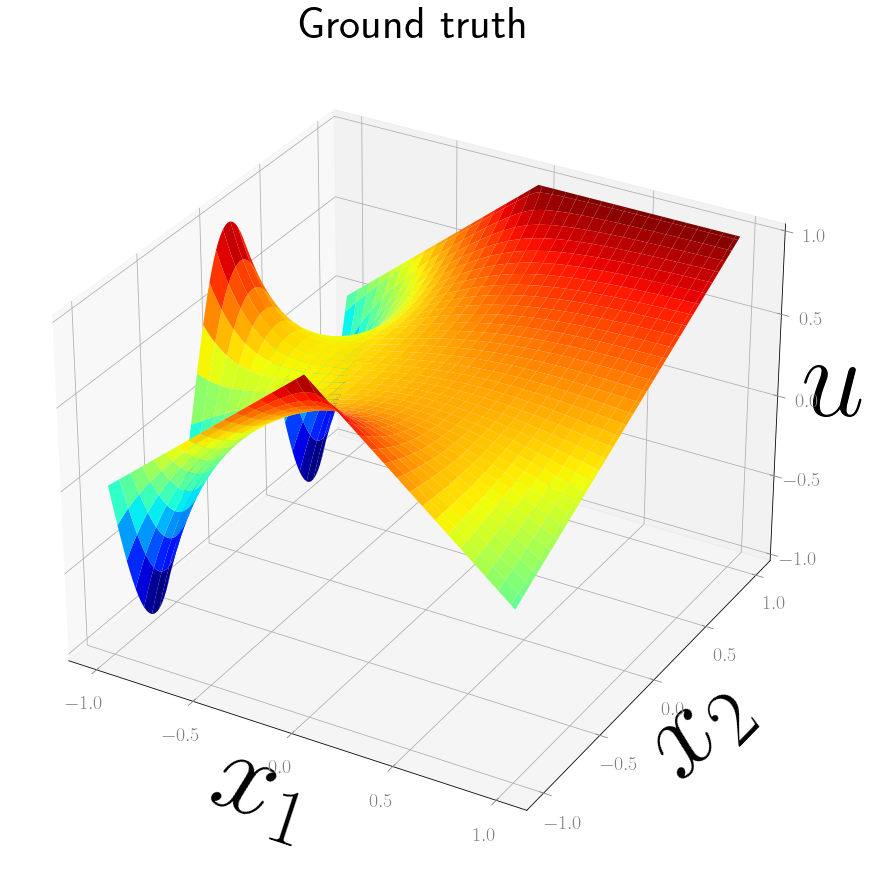

In [7]:
# plot FD solution using matplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, u, cmap=cm.jet, linewidth=1)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
#surf.set_clim(vmin=0, vmax=1) # limits to colorbar
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=20, pad=10)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.set_zticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis, labelpad=19)
ax.set_ylabel('$x_2$', fontproperties=font_axis, labelpad=19)
ax.set_zlabel('$u$', fontproperties=font_axis, labelpad=15)
plt.title('Ground truth', fontproperties=font_title)
plt.show()

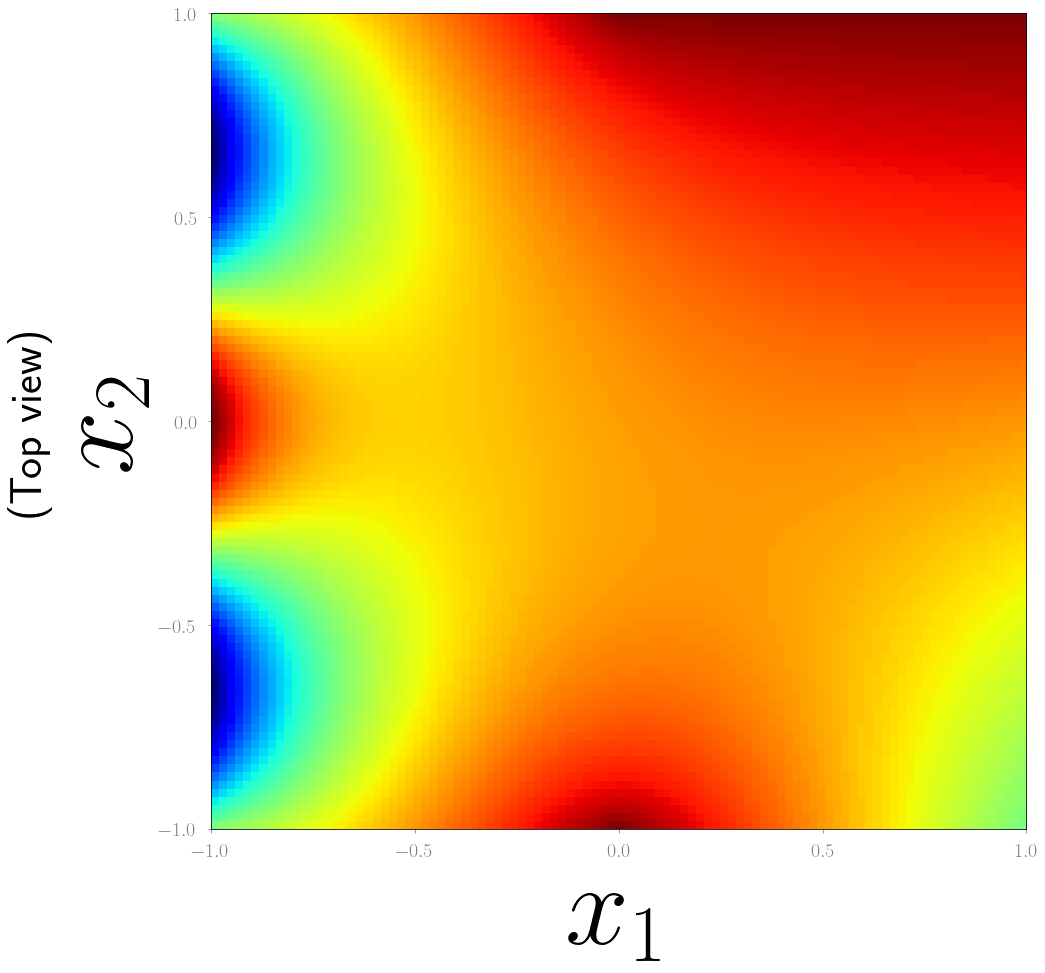

In [8]:
# plot FD solution using matplotlib
fig, ax = plt.subplots(figsize=(15, 15))
img = ax.imshow(u, cmap='jet', origin='lower', extent=[np.min(X1), np.max(X1), np.min(X2), np.max(X2)])
#fig.colorbar(img, ax=ax, shrink=0.8, aspect=10, pad=0.1)
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=20, pad=10)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis)#, labelpad=10)
ax.set_ylabel('$x_2$', fontproperties=font_axis)#, labelpad=4)
ax.text(-1.5, 0.0, '(Top view)', fontproperties=font_title, rotation=90, va='center')
plt.show()

## Devide solution into inner and boundary points

In [64]:
# devide solution u into inner and boundary points
# INNER
i_inner, j_inner = np.where(u[1:-1, 1:-1])
i_inner = i_inner + 1
j_inner = j_inner + 1
u_inner = u[i_inner,j_inner].reshape(n-2,n-2)
# BOUNDARY
i_boundary = []
j_boundary = []
u_boundary = [] # == u[i_boundary, j_boundary]
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        if i == 0 or i == u.shape[0]-1 or j == 0 or j == u.shape[1]-1:
            i_boundary.append(i)
            j_boundary.append(j)
            u_boundary.append(u[i, j]) 
u_boundary = np.array(u_boundary) # u_boundary == u[i_boundary, j_boundary]
i_boundary = np.array(i_boundary)
j_boundary = np.array(j_boundary)

# Sample random data points (from boundary and from inner)

In [107]:
# set the seed for randomness
n_samples_in = 90 # number of samples INSIDE

In [160]:
# uniform samples (inside of Omega)
indices = np.random.choice(u_inner.size, size=n_samples_in, replace=False)
i_in = i_inner[indices]
j_in = j_inner[indices]
# take uniform samples
u_in = u[i_in,j_in]
X1_in = X1[i_in,j_in]
X2_in = X2[i_in,j_in]

# save samples in a csv-file
data = np.column_stack((X1_in, X2_in, u_in))

# save data points, fmt - storage data in floating points
np.savetxt("dataset_laplace.csv", data, delimiter=",", header="x1,x2,u", fmt="%.6f", comments='') 

In [161]:
x_new = []
u_new = []
x_remove = []
x_data = np.column_stack((X1_in, X2_in))
u_data = u_in.reshape((-1,1))
limit = 0.8

for k in range(u_data.shape[0]):
    if (-limit < x_data[k,0]) & (x_data[k,0]<limit) & (-limit < x_data[k,1]) & (x_data[k,1]<limit):
        x_remove.append(x_data[k,:])
    else:
        x_new.append(x_data[k,:])
        u_new.append(u_data[k,:])

        
x_data = np.array(x_new)
u_data = np.array(u_new)
u_data.shape


data = np.column_stack((x_data, u_data))
np.savetxt("dataset_laplace.csv", data, delimiter=",", header="x1,x2,u", fmt="%.6f", comments='') 

(30, 1)

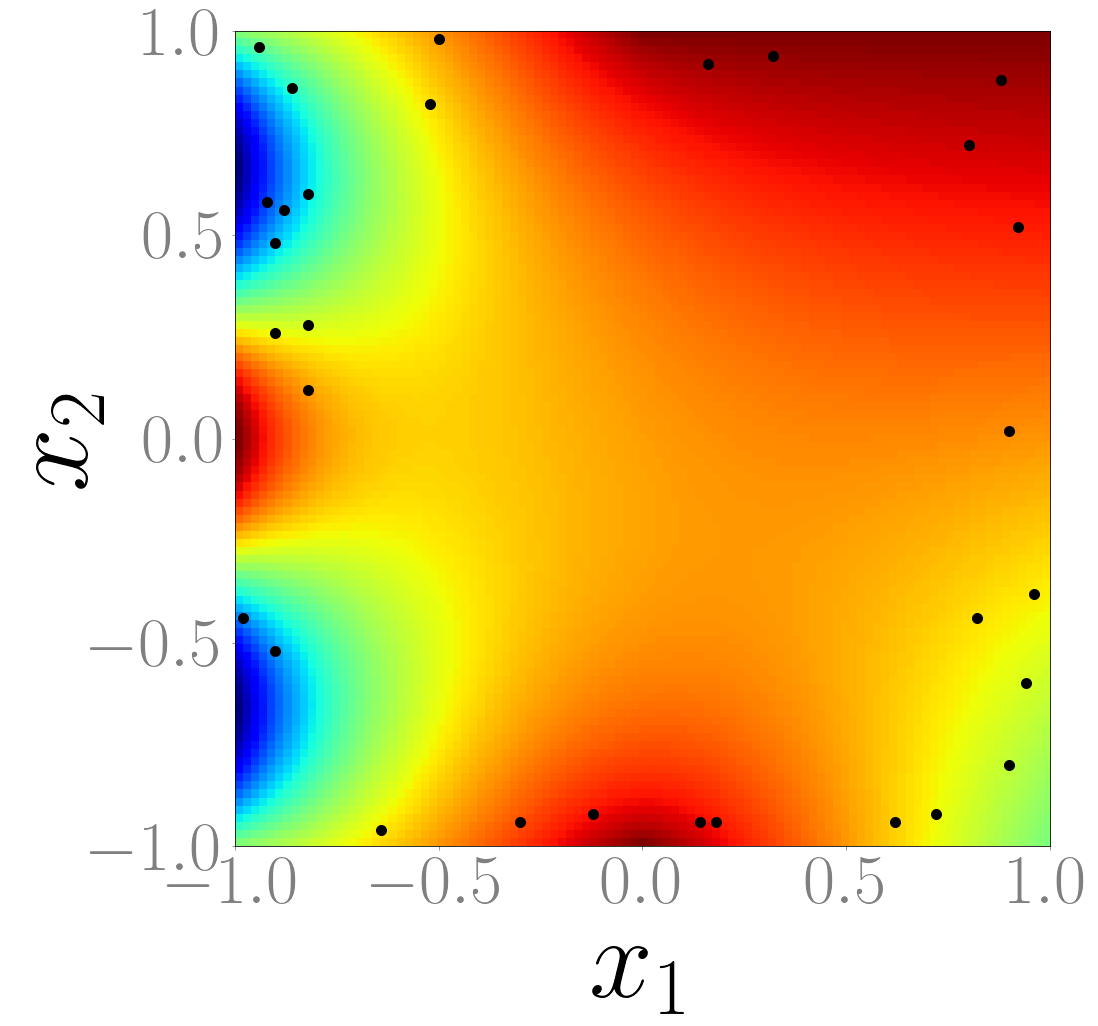

In [162]:
# plot FD solution using matplotlib
fig, ax = plt.subplots(figsize=(15, 15))
img = ax.imshow(u, cmap='jet', origin='lower', extent=[np.min(X1), np.max(X1), np.min(X2), np.max(X2)], vmin=-1, vmax=1)
ax.scatter(x_data[:,0], x_data[:,1], c='black', marker='o', s=10**2, alpha=1, zorder=4)
#fig.colorbar(img, ax=ax, shrink=0.8, aspect=10, pad=0.1)
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=70, pad=5)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis, labelpad=0)
ax.set_ylabel('$x_2$', fontproperties=font_axis, labelpad=-20)
#ax.text(-1.4, 0.0, '(Top view)', fontproperties=font_title, rotation=90, va='center')
plt.savefig('num_2d_bc.jpg', dpi=500, format='jpeg', bbox_inches='tight')
plt.show()

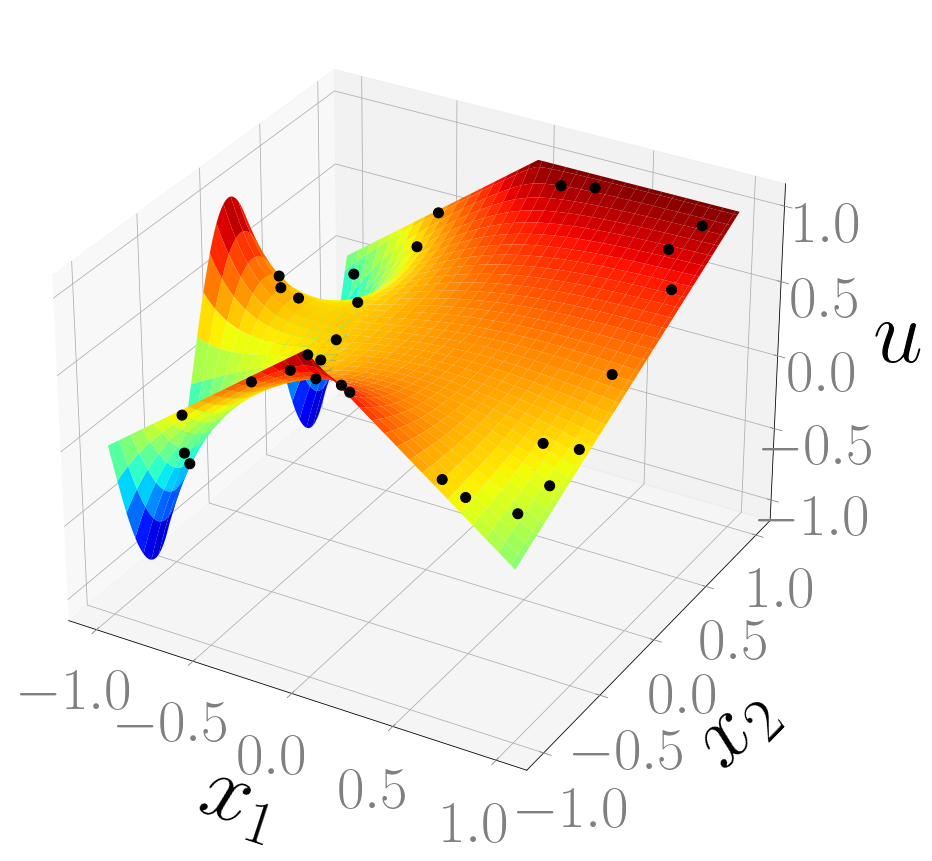

In [163]:
# plot FD solution using matplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
surf = ax.plot_surface(X1, X2, u, cmap=cm.jet, alpha=1)
ax.scatter(x_data[:,0], x_data[:,1], u_data[:,0], c='black', marker='o', s=10**2, alpha=1, zorder=4)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
surf.set_clim(vmin=-1, vmax=1) # limits to colorbar
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=60, pad=20)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.set_zticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis_3d, labelpad=55)
ax.set_ylabel('$x_2$', fontproperties=font_axis_3d, labelpad=55)
ax.set_zlabel('$u$', fontproperties=font_axis_3d, labelpad=55)
#plt.title('Ground truth', fontproperties=font_title)
plt.savefig('num_3d_bc.jpg', dpi=500, format='jpeg', bbox_inches='tight')
plt.show()